import tensorflow as tf
import cv2
import imghdr

In [1]:
import tensorflow as tf
import cv2
import imghdr
import os
import matplotlib.pyplot as plt

In [2]:
data_dir='data'

In [3]:
img_exts=['jpg','png','bmp','jpeg']

In [4]:
for imgclass in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir,imgclass)):
        imgpath=os.path.join(data_dir,imgclass,img)
        try:
            img=cv2.imread(imgpath)
            tip=imghdr.what(imgpath)
            if tip not in img_exts:
                print("image doesnot exist in list{}".format(imgpath))
                os.remove(imgpath)
        except:
            print("issue with image {}".format(imgpath))

In [5]:
import numpy as np

In [6]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 1002 files belonging to 2 classes.


In [7]:
data_Iterator=data.as_numpy_iterator()

In [8]:
batch=data_Iterator.next()

In [9]:
batch[1]

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1])

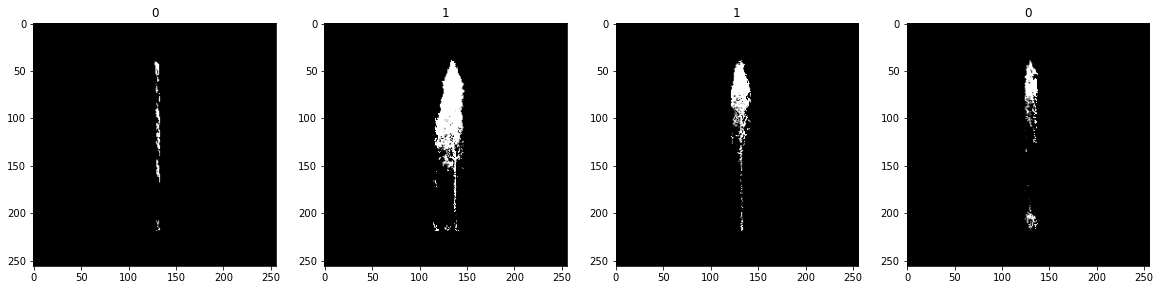

In [10]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [11]:
data=data.map(lambda x,y:(x/255,y))

In [12]:
scaled_iterator=data.as_numpy_iterator()

In [13]:
batch=scaled_iterator.next()

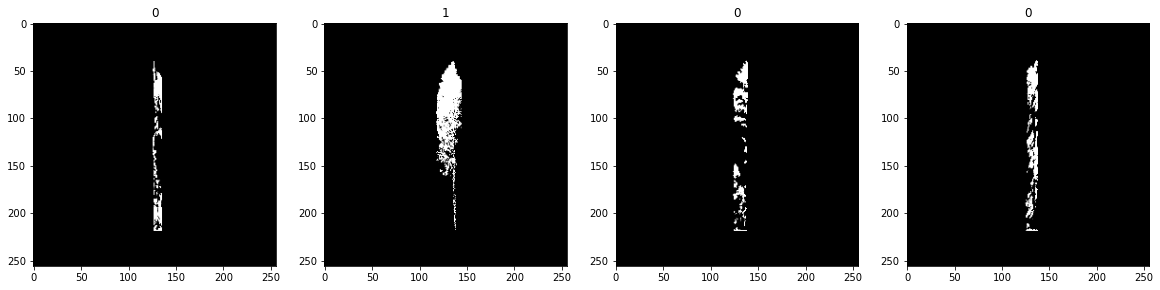

In [14]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [15]:
trainsize=int(len(data)*.7)
valsize=int(len(data)*.2)
testsize=int(len(data)*.1)+1

In [16]:
trainsize

22

In [17]:
valsize

6

In [18]:
testsize

4

In [19]:
train=data.take(trainsize)
val=data.skip(trainsize).take(valsize)
test=data.skip(trainsize+valsize).take(testsize)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [21]:
model1=Sequential()

In [22]:
model1.add(Conv2D(32,(3,3),1,activation="relu",input_shape=(256,256,3)))
model1.add(MaxPooling2D())
model1.add(Conv2D(16,(3,3),1,activation="relu"))
model1.add(MaxPooling2D())
model1.add(Conv2D(8,(3,3),1,activation="relu"))
model1.add(MaxPooling2D())
model1.add(Flatten())
model1.add(Dense(256,activation="relu"))#input layer
model1.add(Dropout(0.4))
model1.add(Dense(1,activation="sigmoid"))#output layer

In [23]:
model1.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [24]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 8)         1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 8)        0

In [25]:
logdir='logs1'

In [26]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)# useful for saving model at particular checkpoints

In [27]:
hist=model1.fit(train,epochs=21,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/21
22/22 [==============================] - 34s 1s/step - loss: 0.4425 - accuracy: 0.8026 - val_loss: 0.2193 - val_accuracy: 0.9479
Epoch 2/21
22/22 [==============================] - 32s 1s/step - loss: 0.1605 - accuracy: 0.9418 - val_loss: 0.0839 - val_accuracy: 0.9740
Epoch 3/21
22/22 [==============================] - 30s 1s/step - loss: 0.0854 - accuracy: 0.9716 - val_loss: 0.0927 - val_accuracy: 0.9792
Epoch 4/21
22/22 [==============================] - 31s 1s/step - loss: 0.0674 - accuracy: 0.9801 - val_loss: 0.0417 - val_accuracy: 0.9896
Epoch 5/21
22/22 [==============================] - 34s 1s/step - loss: 0.0692 - accuracy: 0.9830 - val_loss: 0.0454 - val_accuracy: 0.9948
Epoch 6/21
22/22 [==============================] - 32s 1s/step - loss: 0.0600 - accuracy: 0.9844 - val_loss: 0.0315 - val_accuracy: 0.9948
Epoch 7/21
22/22 [==============================] - 31s 1s/step - loss: 0.0266 - accuracy: 0.9929 - val_loss: 0.0366 - val_accuracy: 0.9844
Epoch 8/21
22/22 [==

In [33]:
hist.history

{'loss': [0.442466139793396,
  0.16048088669776917,
  0.08544617891311646,
  0.06743467599153519,
  0.06924933940172195,
  0.0599978081882,
  0.026556551456451416,
  0.0476173534989357,
  0.02917242795228958,
  0.007318302523344755,
  0.019679291173815727,
  0.014703777618706226,
  0.006557506509125233,
  0.0031703209970146418,
  0.0024033929221332073,
  0.003030157182365656,
  0.002125584054738283,
  0.0012778551317751408,
  0.0028162531089037657,
  0.0011948209721595049,
  0.0004083348612766713],
 'accuracy': [0.8025568127632141,
  0.9417613744735718,
  0.9715909361839294,
  0.9801136255264282,
  0.9829545617103577,
  0.984375,
  0.9928977489471436,
  0.9943181872367859,
  0.9886363744735718,
  1.0,
  0.9914772510528564,
  0.9943181872367859,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9985795617103577,
  1.0,
  1.0],
 'val_loss': [0.21932734549045563,
  0.08387038111686707,
  0.09269588440656662,
  0.041687946766614914,
  0.04540254548192024,
  0.03154705837368965,
  0.03662088885

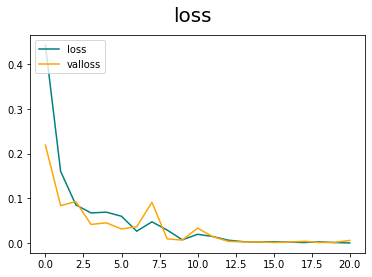

In [34]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='valloss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

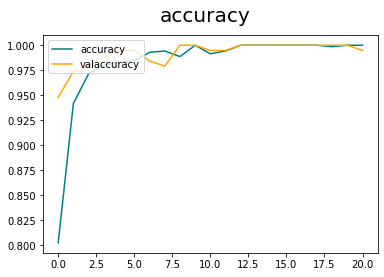

In [35]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='valaccuracy')
fig.suptitle('accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [36]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [37]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model1.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat) 

1/1 [==============================] - 0s 138ms/step


In [39]:
print(f'precission{pre.result().numpy()},recall{re.result().numpy()},accuracy{acc.result().numpy()}')

precission1.0,recall0.9807692170143127,accuracy0.9905660152435303


In [46]:
img=cv2.imread(r'''C:\Users\sooja\Downloads\Tree_NoTree_Dataset\Tree_Images\HAR_AE_22.png''')

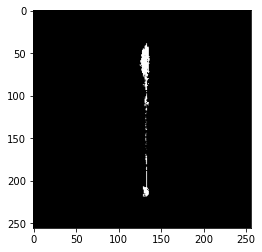

In [47]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:
np.expand_dims(resize/255,0)

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [49]:
yhat=model1.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 29ms/step


In [50]:
if(yhat>0.5):
    print("prediction is tree")
else:
    print("prediction is not tree")

prediction is tree


In [51]:
model1.save(os.path.join('models','treemodel.h5'))